# Part III: What is the best property in terms of Prices for the hosts?

In this notebook we are going to see how Property Types affect Prices of the Listings. For this we'll be using the AirBnb datasets for the two US cities Boston and Seattle. We are using the two cities data to draw comparisons if the trends are similar or follow a different pattern.

With a bar plot visualization we'll get to see, if daily price, monthly price and weekly price of a listing follow similar or a different trend.

In [14]:
#importing necessary libraries
import numpy as np
import pandas as pd
import utilities as u
import matplotlib.pyplot as plt

#reading csv files into data frames for the two cities Boston and Seattle. (Data Gathering)
df_seattle = pd.read_csv('./SEATTLE/listings.csv')
df_boston = pd.read_csv('./BOSTON/listings.csv')

In [15]:
#removing text columns from the dataframes as they are out of scope for further analysis. (Data Cleaning)
df_bost_clean = df_boston.drop(['id','listing_url','scrape_id','last_scraped','name','summary','space','description','experiences_offered','transit', 
                'neighborhood_overview','notes','access','thumbnail_url','host_url','medium_url',
                'picture_url', 'house_rules','interaction','xl_picture_url','host_id','host_name','host_location',
                'host_about','host_thumbnail_url','host_picture_url', 'street','state','zipcode', 'market',
                 'smart_location','country_code','country','license', 'jurisdiction_names'], axis=1)

df_seat_clean = df_seattle.drop(['id','listing_url','scrape_id','last_scraped','name',
                'summary','space','description','experiences_offered','transit', 
         'neighborhood_overview','notes','thumbnail_url','host_url','medium_url',
        'picture_url','xl_picture_url','host_id','host_name','host_location',
        'host_about','host_thumbnail_url','host_picture_url', 'street','state','zipcode', 'market',
         'smart_location','country_code','country','license', 'jurisdiction_names'], axis=1)

In [16]:
#convert amount columns into numeric value for conducting further analysis. (Data Cleaning)
df_bost = u.convert_amount(df_bost_clean.copy(), ['security_deposit','price','monthly_price','cleaning_fee','weekly_price', 'extra_people'])
df_seat = u.convert_amount(df_seat_clean.copy(), ['security_deposit','price','monthly_price','cleaning_fee','weekly_price', 'extra_people'])

In [17]:
'''drop all columns where property type is na as Property type is the basis of our 
analysis and hence we cannot NaN propert type''' 
#Data Cleaning

df_bost_clean = df_bost.dropna(subset=['property_type'],axis=0)
df_seat_clean = df_seat.dropna(subset=['property_type'],axis=0)

In [18]:
#fill all na price columns with mean so as to miss out on propert types with less no of records. 
#Data Cleaning and Preparation.
df_bost_final = pd.concat([u.fill_nan_data(df_bost_clean[['price','monthly_price','weekly_price']],False),df_bost_clean['property_type']],axis=1)
df_seat_final = pd.concat([u.fill_nan_data(df_seat_clean[['price','monthly_price','weekly_price']],False),df_seat_clean['property_type']],axis=1)

/usr/lib/python3/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


# Which type of property has more presence for each city?

Here we'll take count of Propert types for each city and Plot their percentage presence to see what type of properties are more widespread

[Text(0, 0.5, 'Presence'), Text(0.5, 1.0, 'Property_type and Count')]

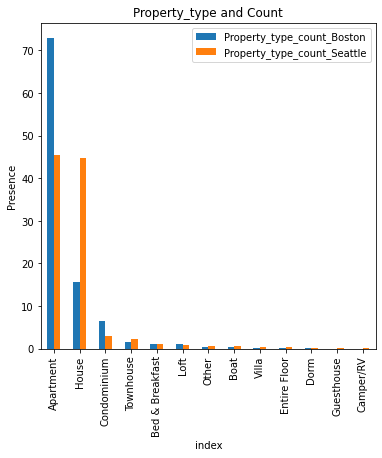

In [19]:
#creating a data frame where Percentage presence of each Property type will be there (Data preparation)
prop_bost = df_bost_final['property_type'].value_counts().to_frame(name='Property_type_count_Boston').reset_index()
prop_seat = df_seat_final['property_type'].value_counts().to_frame(name='Property_type_count_Seattle').reset_index()

#converting value count into percentage (Data Prepartion)
prop_bost['Property_type_count_Boston'] = prop_bost['Property_type_count_Boston']*100/df_bost_final.shape[0]
prop_seat['Property_type_count_Seattle'] = prop_seat['Property_type_count_Seattle']*100/df_seat_final.shape[0]
df = pd.concat([prop_bost,prop_seat['Property_type_count_Seattle']],axis=1)

'''dropping NaN values to not show us unwanted results if a particular property 
type is present in Seattle and not in Boston or vice versa as we want to draw comparisons between two cities.'''
df.dropna(axis=0, inplace=True)
df

#plotting Property type and it's percentage presence.
df.plot(x='index',kind='bar',figsize=(6,6)).set(ylabel='Presence', title="Property_type and Count")


,index,Property_type_count_Boston,Property_type_count_Seattle
0,Apartment,2.035739,1.189472
1,House,0.438011,1.172313
2,Condominium,0.180037,0.080991
3,Townhouse,0.042086,0.062459
4,Bed & Breakfast,0.031955,0.027455
5,Loft,0.030396,0.025396
6,Other,0.013249,0.015100
7,Boat,0.009353,0.014414
8,Villa,0.004676,0.008923
9,Entire Floor,0.003118,0.008923


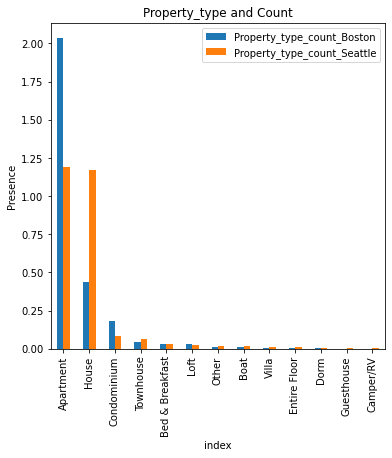

In [20]:
prop_bost['Property_type_count_Boston'] = prop_bost['Property_type_count_Boston']*100/df_bost_final.shape[0]
prop_seat['Property_type_count_Seattle'] = prop_seat['Property_type_count_Seattle']*100/df_seat_final.shape[0]
df = pd.concat([prop_bost,prop_seat['Property_type_count_Seattle']],axis=1)
df.dropna(axis=0, inplace=True)
df.plot(x='index',kind='bar',figsize=(6,6)).set(ylabel='Presence', title="Property_type and Count")
df

'Apartments' (72% and 45%) are widespread across both cities but in Seattle 'Houses'(44%) are present as much

# Variation of Prices with Property Types

Next, we'll see how daily Mean price, weekly Mean price and monthly Mean price varies stands for each property type.

For this we'll calculate mean of all types of prices for each city and plot it against property type.

[Text(0, 0.5, 'Price($)')]

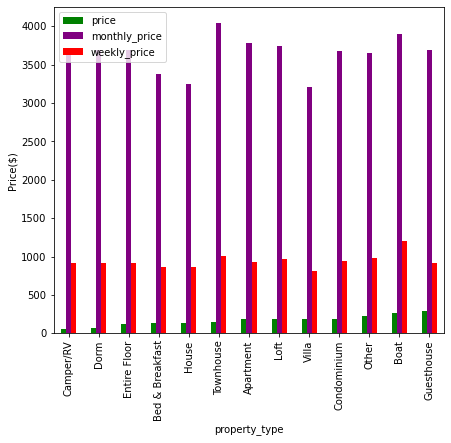

In [21]:
#price variation with property type for boston listings
df_bost_prop = df_bost_final.groupby(['property_type']).mean()[['price','monthly_price','weekly_price']].reset_index()

#bar plot of mean price for Boston (Data Visualization)
df_bost_prop.sort_values(by=['price']).plot(x='property_type',y=['price','monthly_price','weekly_price'],kind='bar',color=['green','purple','red'], figsize=(7,6)).set(ylabel = 'Price($)')

[Text(0, 0.5, 'Price($)')]

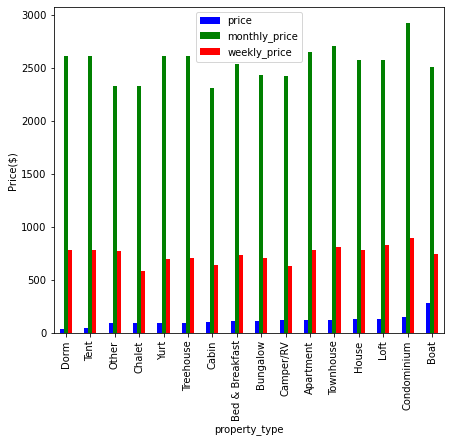

In [22]:
#price variation with property type for seaton listings
df_seat_prop = df_seat_final.groupby(['property_type']).mean()[['price','monthly_price','weekly_price']].reset_index()

#bar plot of mean price for Seattle (Data Visualization)
df_seat_prop.sort_values(by=['price']).plot(x='property_type',y=['price','monthly_price','weekly_price'],kind='bar',color=['blue','green','red'], figsize=(7,6)).set(ylabel = 'Price($)')